In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from artemis.comparision import FeatureInteractionMethodComparator

from artemis.interactions_methods.model_agnostic import FriedmanHStatisticMethod
from artemis.interactions_methods.model_agnostic import GreenwellMethod
from artemis.interactions_methods.model_agnostic import SejongOhMethod
from artemis.utilities.domain import VisualisationType

In [2]:
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target
model = RandomForestRegressor().fit(X, y)

In [3]:
vint = GreenwellMethod()
vint.fit(model, X, 10, show_progress=True)  # all features - GreenwellVariableInteraction

one vs one: 100%|██████████| 28/28 [00:23<00:00,  1.21it/s]


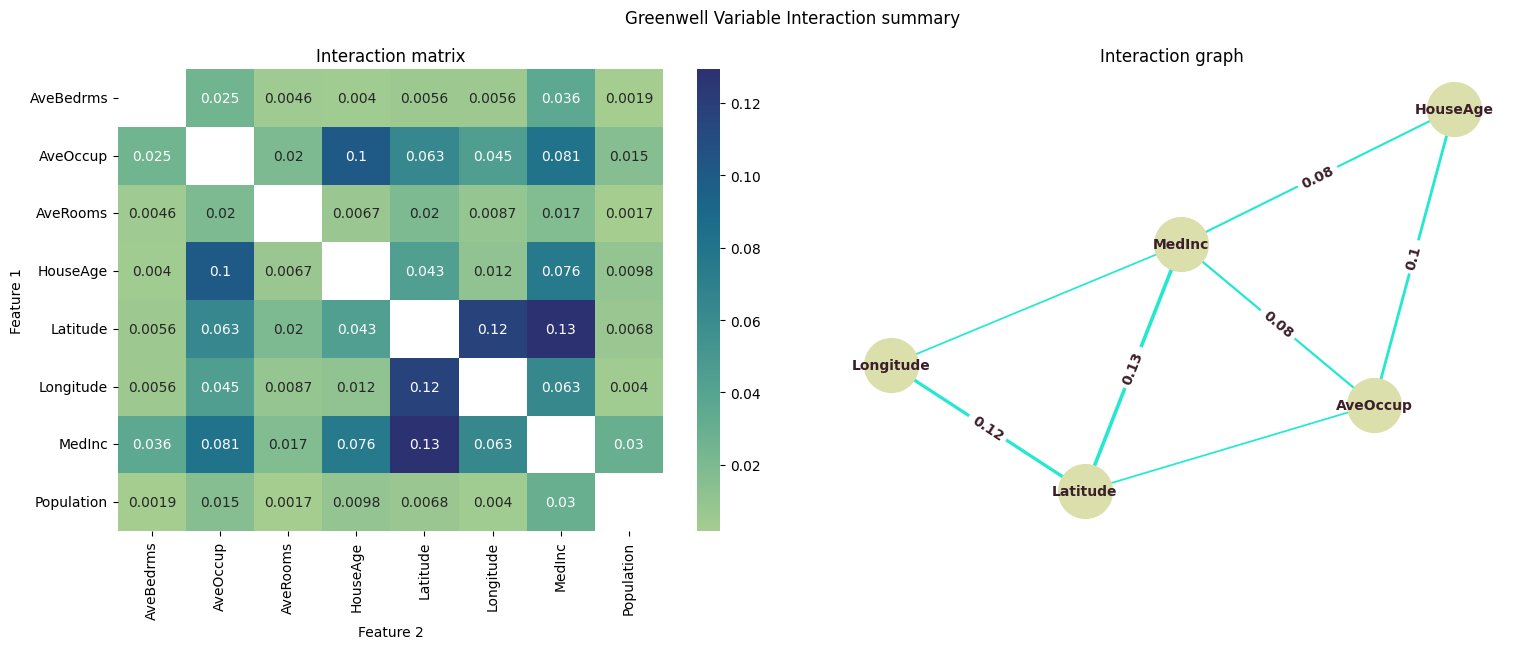

In [21]:
vint.plot()  # summary - GreenwellVariableInteraction

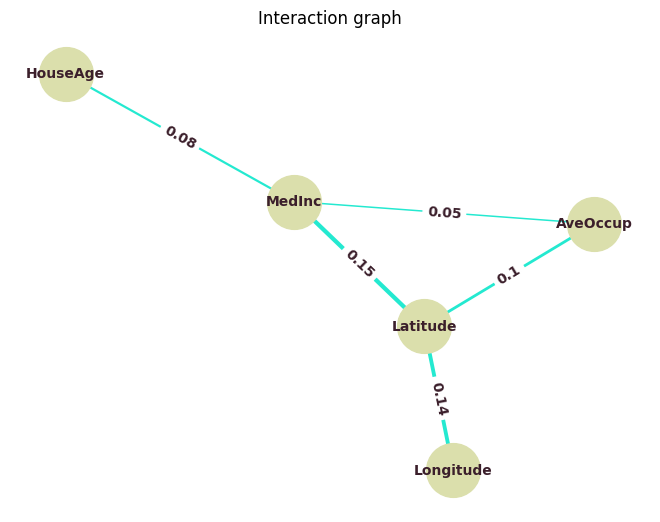

In [5]:
vint.plot(VisualisationType.INTERACTION_GRAPH)  # interaction graph - GreenwellVariableInteraction

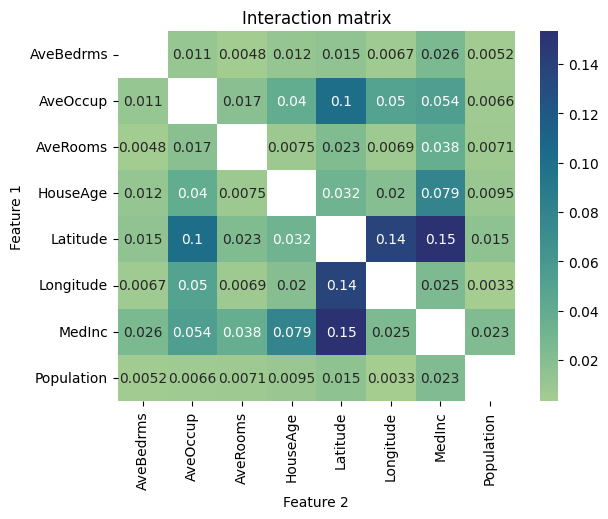

In [6]:
vint.plot(VisualisationType.HEATMAP)  # heatmap - GreenwellVariableInteraction

In [7]:
vint_subset = GreenwellMethod()
vint_subset.fit(model, X, 5, features=["Latitude", "Longitude", "HouseAge"],
                show_progress=True)  # subset of features - GreenwellVariableInteraction

one vs one: 100%|██████████| 3/3 [00:00<00:00,  4.24it/s]


In [4]:
h_stat = FriedmanHStatisticMethod()
h_stat.fit(model, X, 50, show_progress=True)  # all features - FriedmanHStatistic

one vs all: 100%|██████████| 8/8 [00:10<00:00,  1.26s/it]


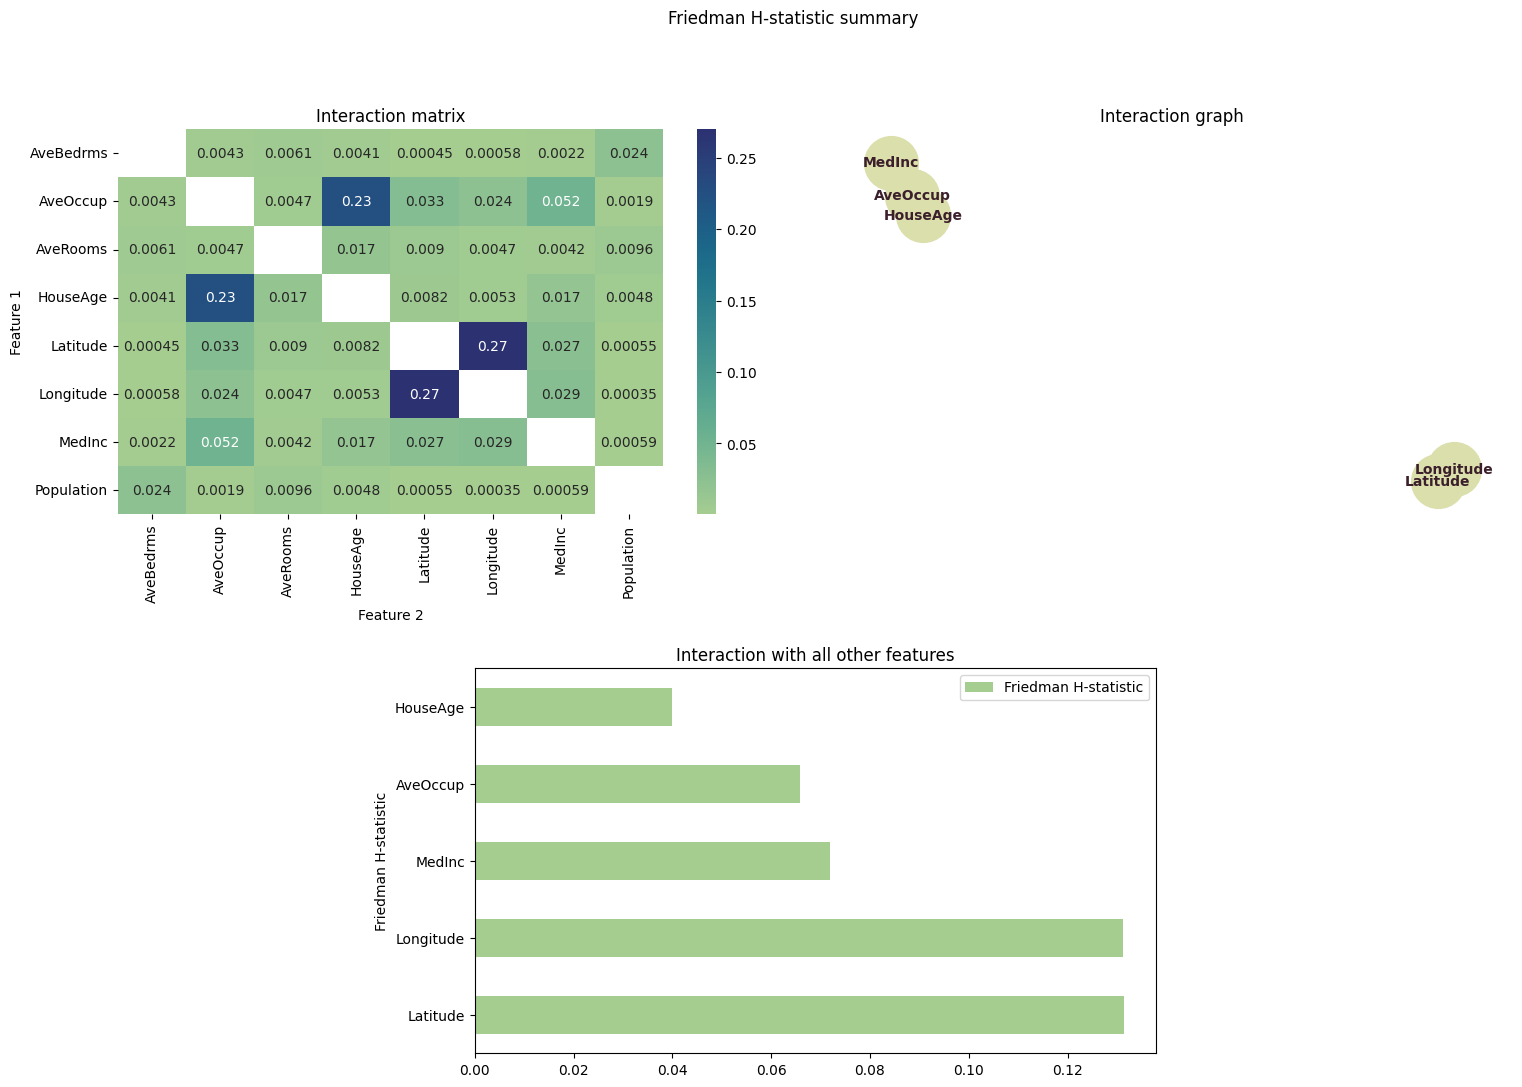

In [23]:
h_stat.plot()  # summary - FriedmanHStatistic

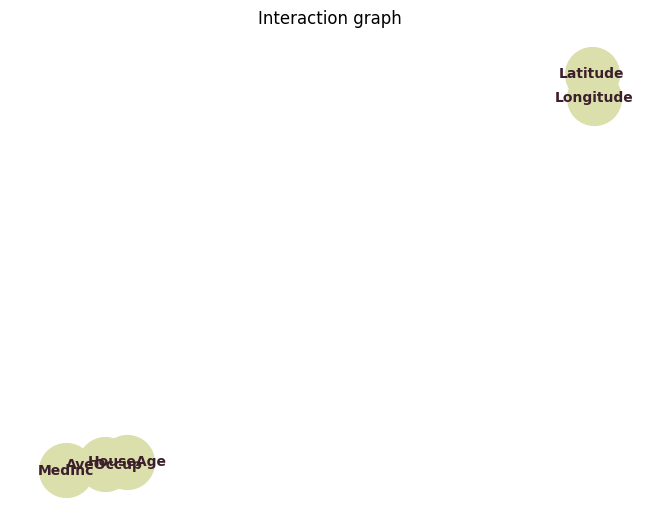

In [24]:
h_stat.plot(VisualisationType.INTERACTION_GRAPH)  # interaction graph - FriedmanHStatistic

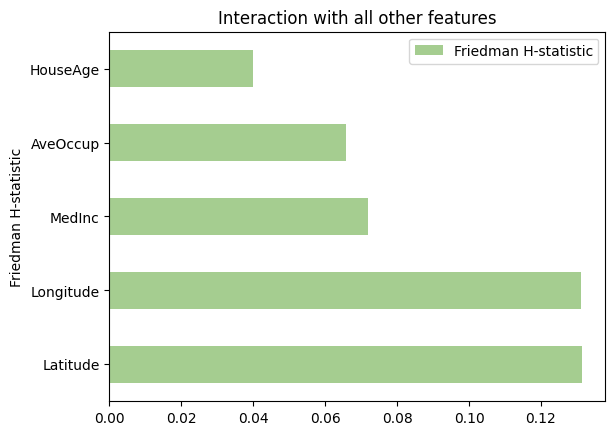

In [25]:
h_stat.plot(VisualisationType.BAR_CHART)  # bar chart - FriedmanHStatistic

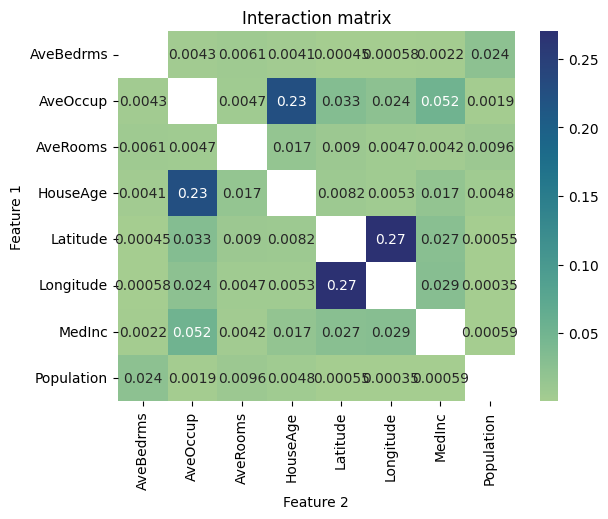

In [26]:
h_stat.plot(VisualisationType.HEATMAP)  # heatmap - FriedmanHStatistic

In [13]:
h_stat_subset = FriedmanHStatisticMethod()
h_stat_subset.fit(model, X, 10, features=["Latitude", "Longitude", "HouseAge"],
                  show_progress=True)  # subset of features - FriedmanHStatistic

one vs all: 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]


In [4]:
perf_based = SejongOhMethod()
perf_based.fit(model, X, y, 100, show_progress=True)  # all features - SejongOhInteraction

100%|██████████| 28/28 [00:11<00:00,  2.36it/s]


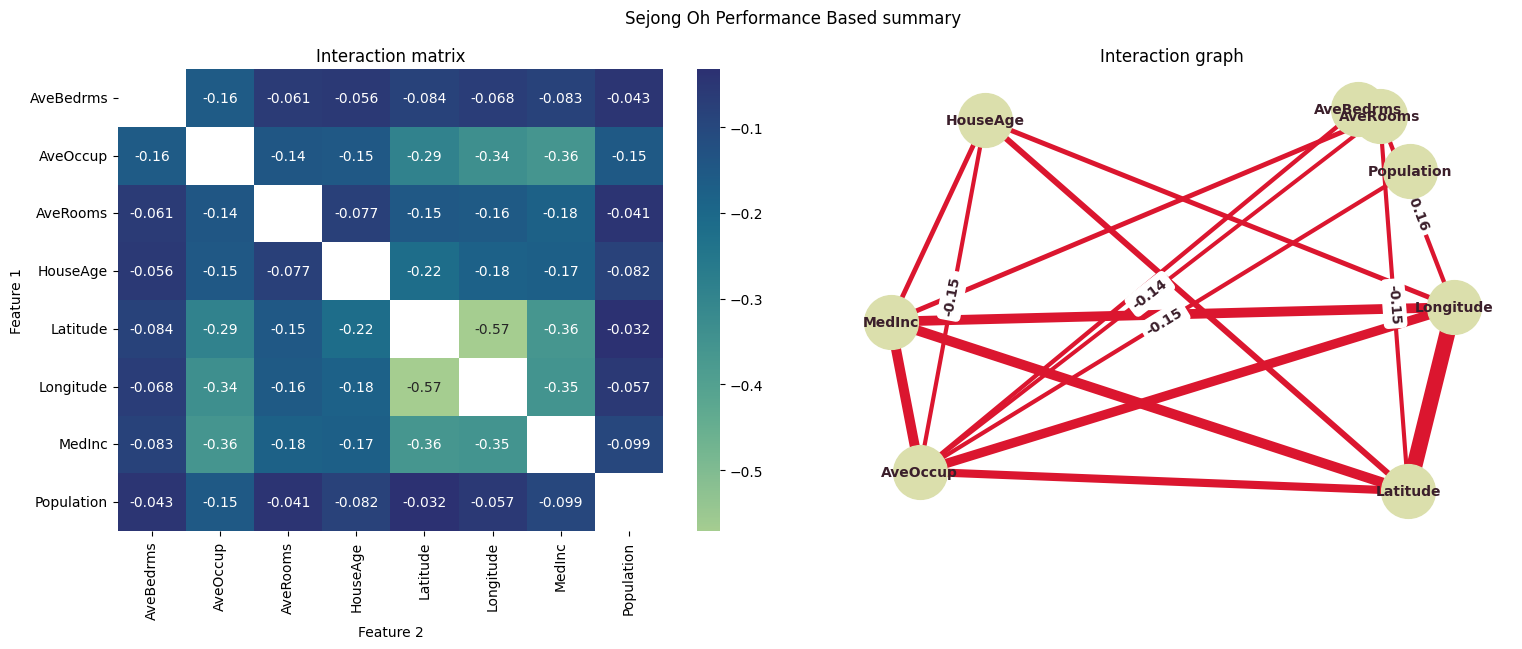

In [30]:
perf_based.plot()  # summary - SejongOhInteraction

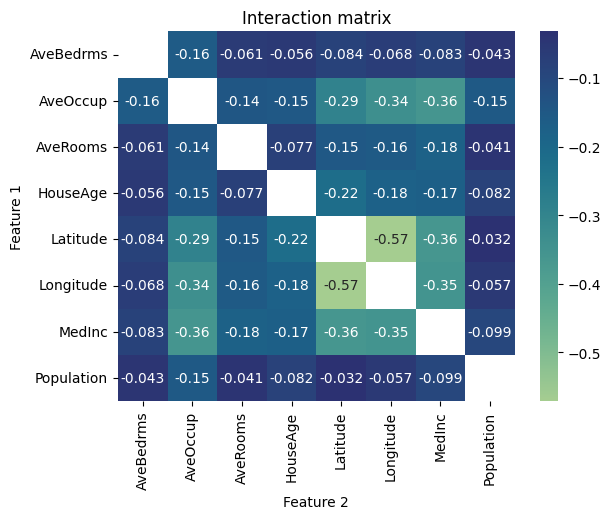

In [31]:
perf_based.plot(VisualisationType.HEATMAP)  # heatmap - SejongOhInteraction

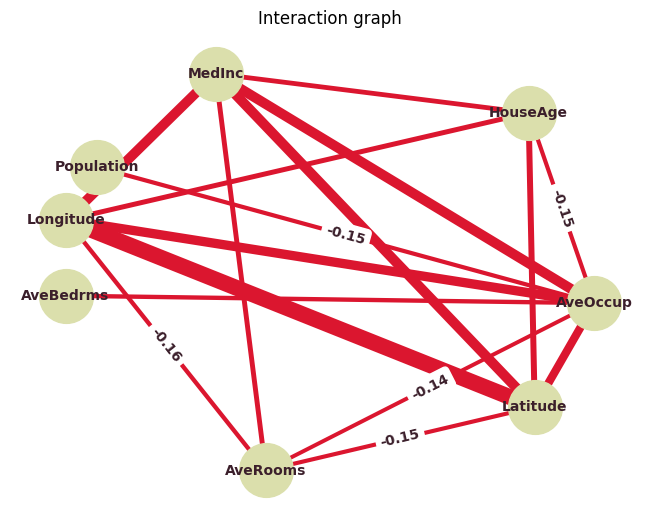

In [32]:
perf_based.plot(VisualisationType.INTERACTION_GRAPH)  # interaction graph - SejongOhInteraction

In [33]:
perf_based = SejongOhMethod()
perf_based.fit(model, X, y, 500, features=["Latitude", "Longitude", "HouseAge"], show_progress=True)  # subset of features - SejongOhInteraction

100%|██████████| 3/3 [00:02<00:00,  1.07it/s]


In [34]:
perf_based.ovo

,Feature 1,Feature 2,Sejong Oh Performance Based
0,Longitude,HouseAge,-0.152088
1,Latitude,HouseAge,-0.189014
2,Latitude,Longitude,-0.557714


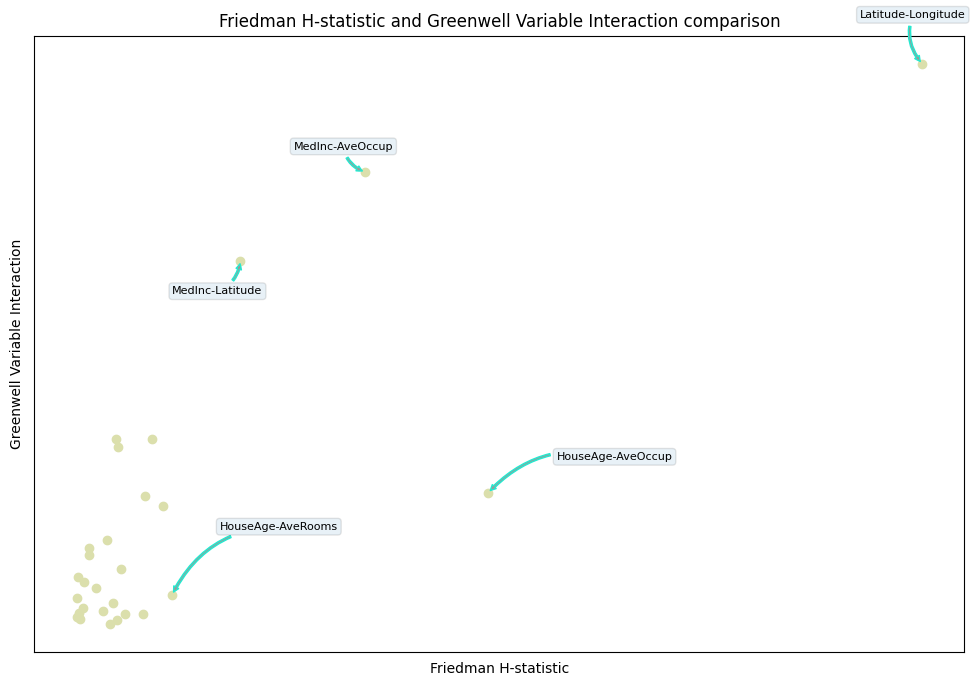

In [7]:
comparator = FeatureInteractionMethodComparator()
comparator.compare_methods(h_stat, vint)